In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import mixture
import seaborn as sns

In [5]:
x_1 = np.random.normal(-5, 1, 3000)
x_2 = np.random.normal(2, 3, 7000)

In [6]:
x = np.concatenate((x_1, x_2))

(array([0.00017545, 0.00122818, 0.01912449, 0.0802702 , 0.11816827,
        0.06579525, 0.03851215, 0.05088166, 0.07097114, 0.08474428,
        0.09211335, 0.08649882, 0.0646548 , 0.04895167, 0.03000263,
        0.01359768, 0.00622862, 0.00403544, 0.00087727, 0.00043863]),
 array([-9.85431437, -8.71441444, -7.57451451, -6.43461458, -5.29471464,
        -4.15481471, -3.01491478, -1.87501485, -0.73511492,  0.40478501,
         1.54468494,  2.68458488,  3.82448481,  4.96438474,  6.10428467,
         7.2441846 ,  8.38408453,  9.52398446, 10.6638844 , 11.80378433,
        12.94368426]),
 <a list of 20 Patch objects>)

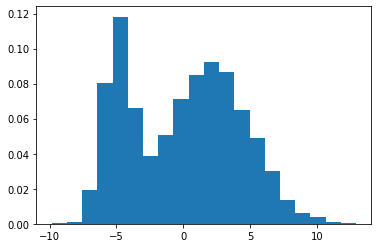

In [7]:
plt.hist(x, bins=20, density=1)

In [8]:
gmm = mixture.GaussianMixture(n_components=2)

In [9]:
gmm.fit(x.reshape(-1, 1))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [12]:
gmm.means_

array([[ 2.14458045],
       [-4.89871701]])

(array([1.000e+01, 1.780e+02, 8.670e+02, 1.375e+03, 8.490e+02, 4.330e+02,
        5.420e+02, 8.090e+02, 9.990e+02, 1.094e+03, 1.038e+03, 7.660e+02,
        5.290e+02, 2.830e+02, 1.390e+02, 5.900e+01, 1.900e+01, 8.000e+00,
        2.000e+00, 1.000e+00]),
 array([-8.90507091, -7.73040656, -6.55574222, -5.38107788, -4.20641354,
        -3.0317492 , -1.85708486, -0.68242051,  0.49224383,  1.66690817,
         2.84157251,  4.01623685,  5.1909012 ,  6.36556554,  7.54022988,
         8.71489422,  9.88955856, 11.0642229 , 12.23888725, 13.41355159,
        14.58821593]),
 <a list of 20 Patch objects>)

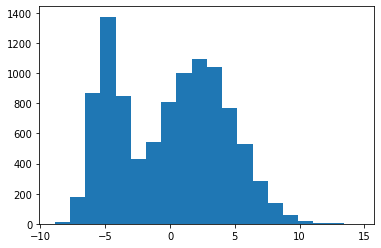

In [15]:
plt.hist(gmm.sample(10000)[0], bins=20)

In [16]:
from sklearn.neighbors import KernelDensity

In [17]:
kde = KernelDensity()

In [19]:
np.array([1, 2, 3]) * np.array([3, 4, 5])

array([ 3,  8, 15])

In [36]:
def root_squared_error(l, mean):
    return np.sqrt(sum(np.square(l - mean)))

In [37]:
def correlation(l1, l2):
    l1_mean = np.mean(l1)
    l2_mean = np.mean(l2)
    numerator = sum((l1-l1_mean)*(l2-l2_mean))
    denominator = root_squared_error(l1, l1_mean) * root_squared_error(l2, l2_mean)
    
    return numerator/denominator

In [33]:
df = pd.read_csv('../data/iris.csv')

In [38]:
correlation(df['SepalLengthCm'], df['PetalLengthCm'])

0.8717541573048717

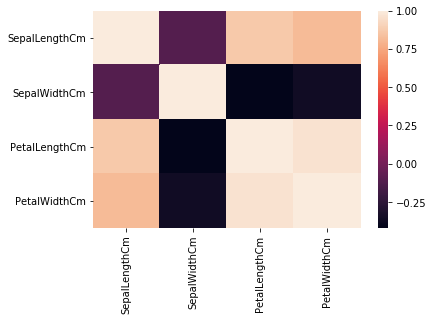

In [46]:
sns.heatmap(df.drop(['Id', 'Species'], axis=1).corr())